# install Library

In [ ]:
# %pip install --quiet --upgrade diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 109.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.6 MB/s eta 0:00:00


In [ ]:
# %pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Successfully uninstalled torchvision-0.15.2+cu118
Found existing installation: torchaudio 2.0.2+cu118
Uninstalling torchaudio-2.0.2+cu118:
  Successfully uninstalled torchaudio-2.0.2+cu118


In [ ]:
%pip install torch==1.13.1+cu117 torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 726.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 58.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 MB 8.8 M

In [ ]:
# The xformers package is mandatory to be able to create several 768x768 images & performance.
# %pip install -q xformers==0.0.16rc425

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 10.8 MB/s eta 0:00:00


#Using Transformer Pre-Train Model Pipeline

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from datetime import datetime

In [ ]:
model_id = "dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to('cuda')

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
prompts = ["Beautiful, abstract art of a human mind, 3D, highly detailed, 8K, aesthetic"]

images = []

In [ ]:
now = datetime.now()

In [ ]:
for i, prompt in enumerate(prompts):
  image = pipe(prompt).images[0]
  image.save(f'result_{i}{now}.jpg')
  images.append(image)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
import os
import matplotlib.pyplot as plt

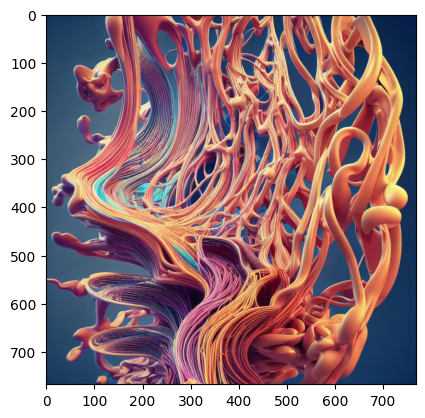

In [ ]:
img = plt.imread('/content/result_02023-07-14 04:20:23.582766.jpg')
plt.imshow(img)

# Manual Method

In [ ]:
import torch
from torch import autocast
import numpy as np

from transformers import CLIPTextModel, CLIPTokenizer

from diffusers import AutoencoderKL, LMSDiscreteScheduler, UNet2DConditionModel
from diffusers.schedulers.scheduling_ddim import DDIMScheduler

from tqdm import tqdm
from PIL import Image

In [ ]:
class ImageDiffusionModel:

    def __init__(self, vae, tokenizer, text_encoder, unet,
                 scheduler_LMS, scheduler_DDIM):
        self.vae = vae
        self.tokenizer = tokenizer
        self.text_encoder = text_encoder
        self.unet = unet
        self.scheduler_LMS = scheduler_LMS
        self.scheduler_DDIM = scheduler_DDIM
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def get_text_embeds(self, text):
        text_input = self.tokenizer(text,
                                    padding='max_length',
                                    max_length=tokenizer.model_max_length,
                                    truncation=True,
                                    return_tensors='pt')
        with torch.no_grad():
            text_embeds = self.text_encoder(text_input.input_ids.to(self.device))[0]
        return text_embeds

    def get_prompt_embeds(self, prompt):
        # get conditional prompt embeddings
        cond_embeds = self.get_text_embeds(prompt)
        uncond_embeds = self.get_text_embeds([''] * len(prompt))
        prompt_embeds = torch.cat([uncond_embeds, cond_embeds])
        return prompt_embeds

    def get_img_latents(self,
                        text_embeds,
                        height=512, width=512,
                        num_inference_steps=50,
                        guidance_scale=7.5,
                        img_latents=None):

        if img_latents is None:
            img_latents = torch.randn((text_embeds.shape[0] // 2, self.unet.in_channels,\
                                       height // 8, width // 8)).to(self.device)
        self.scheduler_LMS.set_timesteps(num_inference_steps)

        img_latents = img_latents * self.scheduler_LMS.sigmas[0]

        with autocast('cuda'):
            for i, t in tqdm(enumerate(self.scheduler_LMS.timesteps)):
                latent_model_input = torch.cat([img_latents] * 2)
                sigma = self.scheduler_LMS.sigmas[i]
                latent_model_input = latent_model_input / ((sigma ** 2 + 1) ** 0.5)

                with torch.no_grad():
                    noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=text_embeds)['sample']

                noise_pred_uncond, noise_pred_cond = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_cond - noise_pred_uncond)

                img_latents = self.scheduler_LMS.step(noise_pred, t, img_latents)['prev_sample']

        return img_latents

    def decode_img_latents(self, img_latents):
        img_latents = img_latents / 0.18215
        with torch.no_grad():
            imgs = self.vae.decode(img_latents)["sample"]
        # load image in the CPU
        imgs = imgs.detach().cpu()
        return imgs

    def transform_imgs(self, imgs):
        imgs = (imgs / 2 + 0.5).clamp(0, 1)
        imgs = imgs.permute(0, 2, 3, 1).numpy()
        imgs = (imgs * 255).round().astype('uint8')
        # convert to PIL Image objects
        imgs = [Image.fromarray(img) for img in imgs]
        return imgs

    def prompt_to_img(self,
                      prompts,
                      height=512, width=512,
                      num_inference_steps=50,
                      guidance_scale=7.5,
                      img_latents=None):

        # convert prompt to a list
        if isinstance(prompts, str):
            prompts = [prompts]

        # get prompt embeddings
        text_embeds = self.get_prompt_embeds(prompts)
        img_latents = self.get_img_latents(text_embeds,
                                      height, width,
                                      num_inference_steps,
                                      guidance_scale,
                                      img_latents)
        # decode the image embeddings
        imgs = self.decode_img_latents(img_latents)
        # convert decoded image to suitable PIL Image format
        imgs = self.transform_imgs(imgs)

        return imgs

    def encode_img_latents(self, imgs):
        if not isinstance(imgs, list):
            imgs = [imgs]

        imgs = np.stack([np.array(img) for img in imgs], axis=0)
        imgs = 2 * ((imgs / 255.0) - 0.5)
        imgs = torch.from_numpy(imgs).float().permute(0, 3, 1, 2)

        # encode images
        img_latents_dist = self.vae.encode(imgs.to(self.device))
        img_latents = img_latents_dist["latent_dist"].mean.clone()
        img_latents *= 0.18215

        return img_latents

    def get_img_latents_similar(self,
                                img_latents,
                                text_embeds,
                                height=512, width=512,
                                num_inference_steps=50,
                                guidance_scale=7.5,
                                start_step=10):

        self.scheduler_DDIM.set_timesteps(num_inference_steps)

        if start_step > 0:
            start_timestep = self.scheduler_DDIM.timesteps[start_step]
            start_timesteps = start_timestep.repeat(img_latents.shape[0]).long()

            noise = torch.randn_like(img_latents)
            img_latents = scheduler_DDIM.add_noise(img_latents, noise, start_timesteps)

        with autocast('cuda'):
            for i, t in tqdm(enumerate(self.scheduler_DDIM.timesteps[start_step:])):
                latent_model_input = torch.cat([img_latents] * 2)

                with torch.no_grad():
                    noise_pred = self.unet(latent_model_input, t, encoder_hidden_states=text_embeds)['sample']

                noise_pred_uncond, noise_pred_cond = noise_pred.chunk(2)
                noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_cond - noise_pred_uncond)

                img_latents = self.scheduler_DDIM.step(noise_pred, t, img_latents)['prev_sample']

        return img_latents

    def similar_imgs(self,
                     img,
                     prompt,
                     height=512, width=512,
                     num_inference_steps=50,
                     guidance_scale=7.5,
                     start_step=10):

        img_latents = self.encode_img_latents(img)

        if isinstance(prompt, str):
            prompt = [prompt]

        text_embeds = self.get_prompt_embeds(prompt)

        img_latents = self.get_img_latents_similar(img_latents=img_latents,
                                                   text_embeds=text_embeds,
                                                height=height, width=width,
                                                num_inference_steps=num_inference_steps,
                                                guidance_scale=guidance_scale,
                                                start_step=start_step)

        imgs = self.decode_img_latents(img_latents)
        imgs = self.transform_imgs(imgs)
        torch.cuda.empty_cache()

        return imgs

In [ ]:
device = 'cuda'
# Load autoencoder
vae = AutoencoderKL.from_pretrained('CompVis/stable-diffusion-v1-4',
                                    subfolder='vae').to(device)
# Load tokenizer and the text encoder
tokenizer = CLIPTokenizer.from_pretrained('openai/clip-vit-large-patch14')
text_encoder = CLIPTextModel.from_pretrained('openai/clip-vit-large-patch14').to(device)
# Load UNet model
unet = UNet2DConditionModel.from_pretrained('CompVis/stable-diffusion-v1-4', subfolder='unet').to(device)
# Load schedulers
scheduler_LMS = LMSDiscreteScheduler(beta_start=0.00085,
                                 beta_end=0.012,
                                 beta_schedule='scaled_linear',
                                 num_train_timesteps=1000)

scheduler_DDIM = DDIMScheduler(beta_start=0.00085,
                               beta_end=0.012,
                               beta_schedule='scaled_linear',
                               num_train_timesteps=1000)

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.6.mlp.fc1.bias', 'vision_model.encoder.layers.23.self_attn.v_proj.bias', 'vision_model.encoder.layers.4.self_attn.k_proj.bias', 'vision_model.embeddings.position_embedding.weight', 'vision_model.encoder.layers.14.self_attn.q_proj.weight', 'vision_model.encoder.layers.21.self_attn.k_proj.bias', 'vision_model.encoder.layers.1.self_attn.k_proj.bias', 'vision_model.encoder.layers.1.mlp.fc1.bias', 'vision_model.encoder.layers.2.layer_norm2.bias', 'vision_model.encoder.layers.3.layer_norm1.bias', 'vision_model.encoder.layers.19.mlp.fc2.weight', 'vision_model.encoder.layers.12.self_attn.k_proj.weight', 'vision_model.encoder.layers.19.self_attn.k_proj.weight', 'vision_model.encoder.layers.15.self_attn.v_proj.weight', 'vision_model.encoder.layers.9.self_attn.v_proj.weight', 'vision_model.encoder.layers.22.self_attn.v_proj.bias', 'vision_model.encoder

<ipython-input-16-c2bfbfb42cb0>:38: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  img_latents = torch.randn((text_embeds.shape[0] // 2, self.unet.in_channels,\
50it [00:13,  3.65it/s]


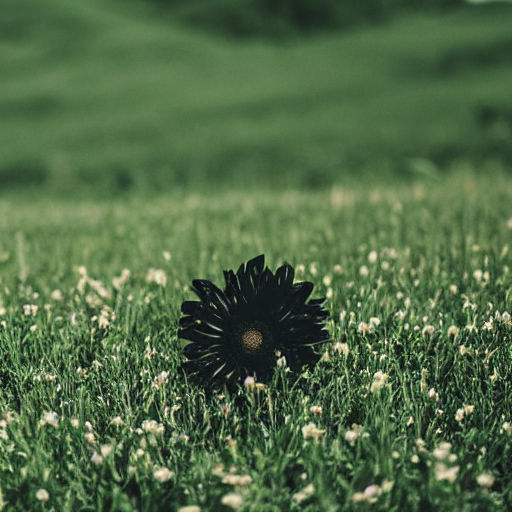

In [ ]:
model = ImageDiffusionModel(vae, tokenizer, text_encoder, unet, scheduler_LMS, scheduler_DDIM)

prompts = "black flower on green field" #@param{type: "string"}

imgs = model.prompt_to_img(prompts)

imgs[0]